In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = '/kaggle/input/my-project/dataset_2_E-commerce Product Sales.csv'
data = pd.read_csv(file_path)


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop_duplicates()
data = data.fillna({
    'Quantity': 0,
    'Revenue': 0,
    'Discount': 0.0
})


In [4]:
avg_quantity_by_product = data.groupby('Product')['Quantity'].mean()
total_revenue_by_region = data.groupby('Region')['Revenue'].sum()
sales_by_month = data.groupby(data['Date'].dt.month)['Quantity'].sum()


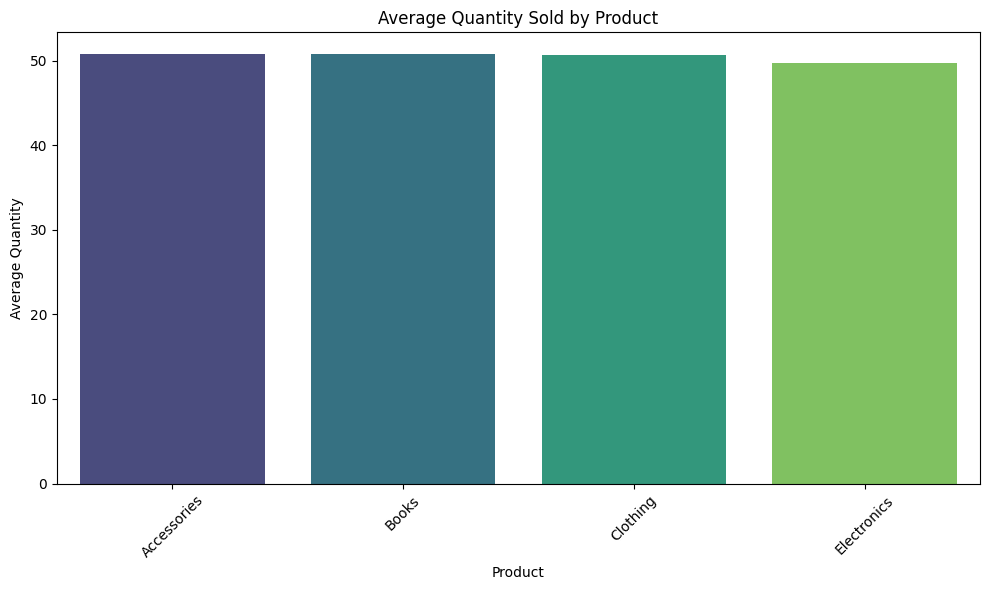

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_quantity_by_product.index, y=avg_quantity_by_product.values, palette="viridis")
plt.title("Average Quantity Sold by Product")
plt.ylabel("Average Quantity")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


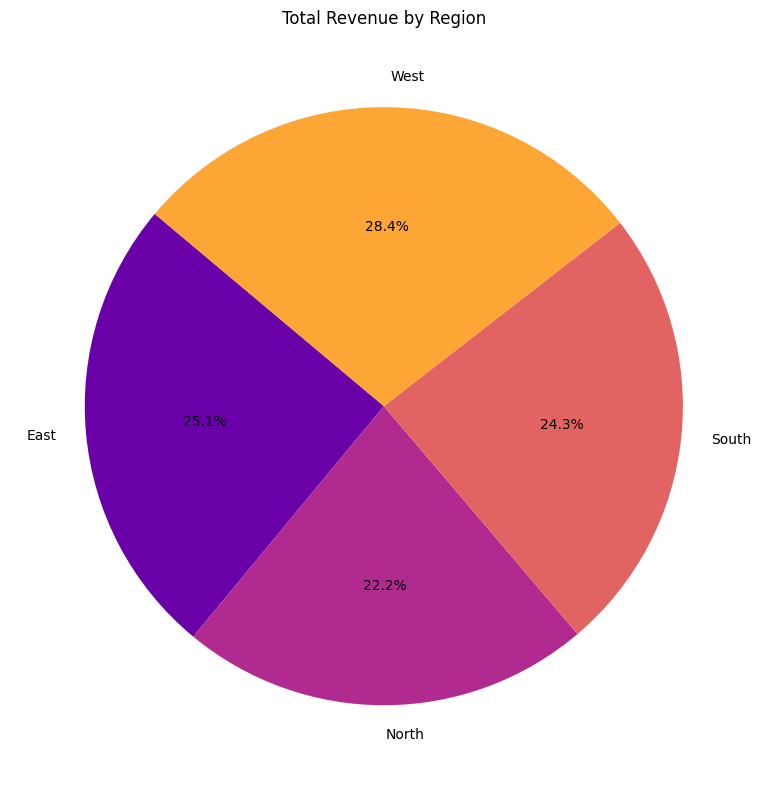

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(
    total_revenue_by_region.values, 
    labels=total_revenue_by_region.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("plasma", len(total_revenue_by_region))
)
plt.title("Total Revenue by Region")
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


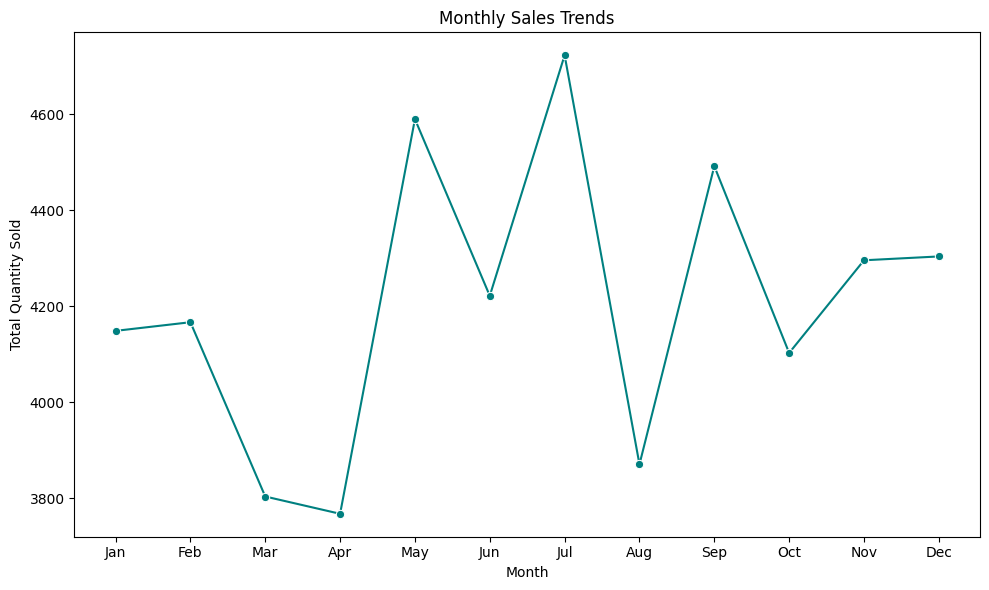

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o', color="teal")
plt.title("Monthly Sales Trends")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()


In [8]:
print("Dataset overview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing value in each column:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())


Dataset overview:
        Date      Product Region Customer_Type  Quantity   Price  Discount  \
0 2024-12-05     Clothing  North           VIP        94  220.52      0.28   
1 2024-07-10        Books  North       Regular        62  272.57      0.16   
2 2024-04-09  Electronics   West           VIP        72  131.71      0.06   
3 2024-09-23     Clothing   East           VIP        16   37.20      0.19   
4 2024-04-21  Accessories  North           VIP        91  205.42      0.14   

    Revenue  
0  14924.79  
1  14195.45  
2   8914.13  
3    482.11  
4  16076.17  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Product        1000 non-null   object        
 2   Region         1000 non-null   object        
 3   Customer_Type  1000 non-null   object        
 4 

In [9]:
print("\nUnique Products:")
print(data['Product'].unique())

print("\nUnique Regions:")
print(data['Region'].unique())

print("\nUnique Customer Types:")
print(data['Customer_Type'].unique())



Unique Products:
['Clothing' 'Books' 'Electronics' 'Accessories']

Unique Regions:
['North' 'West' 'East' 'South']

Unique Customer Types:
['VIP' 'Regular']
